In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import os

#### Information on data:
- Booking data for 2 hotels 
- Both hotels are located in Portugal: H1 at the resort region of Algarve and H2 at the city of Lisbon
- Source: https://www.sciencedirect.com/science/article/pii/S2352340918315191

#### Model: 
- Bookings cancellation prediction: development of prediction models to classify a hotel booking׳s likelihood to be canceled. 
- Or do a cancelation ratio per day & probability of it to occur (??)

### Read clean data from csv

In [2]:
data = pd.read_csv('../data/Hotels.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotel,Arrival_Date_MonthN,ArrivalDateFull,TotalNights
0,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,Not applicable,Not applicable,0,Transient,75.0,0,0,Check-Out,2015-07-02,H1,7,2015-07-01,1
1,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,Not applicable,0,Transient,75.0,0,0,Check-Out,2015-07-02,H1,7,2015-07-01,1
2,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,Not applicable,0,Transient,98.0,0,1,Check-Out,2015-07-03,H1,7,2015-07-01,2
3,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,Not applicable,0,Transient,98.0,0,1,Check-Out,2015-07-03,H1,7,2015-07-01,2
4,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,Not applicable,Not applicable,0,Transient,107.0,0,0,Check-Out,2015-07-03,H1,7,2015-07-01,2


### Feature engineering

In [5]:
data_drop = data.sample(10000)

Drop irrelevant columns

In [6]:
data_drop.drop(['TotalNights', 'ArrivalDateFull', 'Arrival_Date_MonthN', 'ReservationStatusDate', 
                'TotalOfSpecialRequests', 'AssignedRoomType', 'Meal', 'ReservationStatus'], axis=1, inplace=True)

In [7]:
print(data_drop.shape)
data_drop.head()

(10000, 27)


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,Hotel
72561,1,143,2017,August,32,12,2,1,2,0.0,0,BEL,Online TA,TA/TO,0,0,0,A,0,No Deposit,9,Not applicable,0,Transient,130.5,0,H2
38207,0,0,2017,July,29,21,0,2,2,0.0,0,AUS,Online TA,TA/TO,0,0,0,D,0,No Deposit,241,Not applicable,0,Transient,160.0,0,H1
112852,0,27,2017,June,23,7,0,4,2,0.0,0,ITA,Direct,Direct,0,0,0,D,0,No Deposit,14,Not applicable,0,Transient,153.0,0,H2
45433,0,98,2015,November,48,23,1,3,1,0.0,0,DZA,Groups,TA/TO,0,0,0,A,1,No Deposit,37,Not applicable,0,Transient-Party,70.0,0,H2
65956,1,133,2017,April,16,19,0,4,1,0.0,0,PRT,Offline TA/TO,TA/TO,0,0,0,A,1,No Deposit,390,Not applicable,0,Transient-Party,90.0,0,H2


#### Reduce Agent, Country and Company columns

In [8]:
data_drop.Agent = [agent.strip() for agent in data_drop.Agent]

In [9]:
top = list(data_drop.Agent.value_counts().head(10).index)
top = [x for x in top if x != 'Not applicable']
top

['9', '240', '1', '14', '6', '7', '250', '241', '28']

In [10]:
for agent in data_drop.Agent:
    if agent == 'Not applicable':
        continue
    if agent not in top:
        data_drop.Agent = data_drop.Agent.replace(agent, 'Other')
    else:
        continue

In [11]:
data_drop.Agent.value_counts()

Other             2785
9                 2677
Not applicable    1371
240               1163
1                  604
14                 335
6                  274
7                  273
250                228
241                158
28                 132
Name: Agent, dtype: int64

#### Country

In [12]:
top_c = data_drop.Country.value_counts().head(10)

In [13]:
for country in data_drop.Country:
    if country not in top_c:
        data_drop.Country = data_drop.Country.replace(country, 'OTHER')

In [14]:
data_drop.Country.value_counts()

PRT      4007
OTHER    1606
GBR      1067
FRA       871
ESP       699
DEU       601
ITA       282
IRL       277
BEL       215
BRA       192
NLD       183
Name: Country, dtype: int64

#### Company

In [15]:
top_comp = list(data_drop.Company.value_counts().head(10).index)
top_comp = [x for x in top_comp if x != 'Not applicable']

In [16]:
top_comp

['       Not applicable',
 '        223',
 '         40',
 '         45',
 '         67',
 '        153',
 '        405',
 '        281',
 '        154',
 '        135']

In [17]:
for company in data_drop.Company:
    if company == 'Not applicable':
        continue
    if company not in top_comp:
         data_drop.Company = data_drop.Company.replace(company, 'Other')
    else:
        continue

In [18]:
data_drop.Company.value_counts()

       Not applicable    9419
Other                     326
        223                72
         40                65
         45                27
         67                25
        153                17
        405                14
        281                13
        154                11
        135                11
Name: Company, dtype: int64

In [19]:
print(data_drop.shape)
data_drop.head()

(10000, 27)


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,Hotel
72561,1,143,2017,August,32,12,2,1,2,0.0,0,BEL,Online TA,TA/TO,0,0,0,A,0,No Deposit,9,Not applicable,0,Transient,130.5,0,H2
38207,0,0,2017,July,29,21,0,2,2,0.0,0,OTHER,Online TA,TA/TO,0,0,0,D,0,No Deposit,241,Not applicable,0,Transient,160.0,0,H1
112852,0,27,2017,June,23,7,0,4,2,0.0,0,ITA,Direct,Direct,0,0,0,D,0,No Deposit,14,Not applicable,0,Transient,153.0,0,H2
45433,0,98,2015,November,48,23,1,3,1,0.0,0,OTHER,Groups,TA/TO,0,0,0,A,1,No Deposit,Other,Not applicable,0,Transient-Party,70.0,0,H2
65956,1,133,2017,April,16,19,0,4,1,0.0,0,PRT,Offline TA/TO,TA/TO,0,0,0,A,1,No Deposit,Other,Not applicable,0,Transient-Party,90.0,0,H2


### One Hot Encoding

In [20]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 72561 to 16656
Data columns (total 27 columns):
IsCanceled                     10000 non-null int64
LeadTime                       10000 non-null int64
ArrivalDateYear                10000 non-null int64
ArrivalDateMonth               10000 non-null object
ArrivalDateWeekNumber          10000 non-null int64
ArrivalDateDayOfMonth          10000 non-null int64
StaysInWeekendNights           10000 non-null int64
StaysInWeekNights              10000 non-null int64
Adults                         10000 non-null int64
Children                       10000 non-null float64
Babies                         10000 non-null int64
Country                        10000 non-null object
MarketSegment                  10000 non-null object
DistributionChannel            10000 non-null object
IsRepeatedGuest                10000 non-null int64
PreviousCancellations          10000 non-null int64
PreviousBookingsNotCanceled    10000 non-null int

In [21]:
data_dummies = pd.get_dummies(data=data_drop, columns=['ArrivalDateMonth', 'Country', 'MarketSegment', 
                                                       'DistributionChannel', 'ReservedRoomType', 'DepositType', 
                                                       'Agent', 'Company', 'CustomerType', 
                                                       'Hotel'])

In [22]:
print(data_dummies.shape)
data_dummies.head()

(10000, 91)


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,ArrivalDateMonth_April,ArrivalDateMonth_August,ArrivalDateMonth_December,ArrivalDateMonth_February,ArrivalDateMonth_January,ArrivalDateMonth_July,ArrivalDateMonth_June,ArrivalDateMonth_March,ArrivalDateMonth_May,ArrivalDateMonth_November,ArrivalDateMonth_October,ArrivalDateMonth_September,Country_BEL,Country_BRA,Country_DEU,Country_ESP,Country_FRA,Country_GBR,Country_IRL,Country_ITA,Country_NLD,Country_OTHER,Country_PRT,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS,DistributionChannel_TA/TO,ReservedRoomType_A,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_H,ReservedRoomType_L,DepositType_No Deposit,DepositType_Non Refund,DepositType_Refundable,Agent_1,Agent_14,Agent_240,Agent_241,Agent_250,Agent_28,Agent_6,Agent_7,Agent_9,Agent_Not applicable,Agent_Other,Company_ 40,Company_ 45,Company_ 67,Company_ 135,Company_ 153,Company_ 154,Company_ 223,Company_ 281,Company_ 405,Company_ Not applicable,Company_Other,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,Hotel_H1,Hotel_H2
72561,1,143,2017,32,12,2,1,2,0.0,0,0,0,0,0,0,130.5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
38207,0,0,2017,29,21,0,2,2,0.0,0,0,0,0,0,0,160.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
112852,0,27,2017,23,7,0,4,2,0.0,0,0,0,0,0,0,153.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
45433,0,98,2015,48,23,1,3,1,0.0,0,0,0,0,1,0,70.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
65956,1,133,2017,16,19,0,4,1,0.0,0,0,0,0,1,0,90.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


## Testing ML Models

In [24]:
df_ml=data_dummies.copy()

##### Proportion of canceled vs non canceled in full ml dataset:

In [25]:
df_ml['IsCanceled'].value_counts(normalize=True)

0    0.6253
1    0.3747
Name: IsCanceled, dtype: float64

##### Define X and y:

In [26]:
y = df_ml["IsCanceled"]
X_cols = [col for col in df_ml.columns if col != "IsCanceled"]
X = df_ml[X_cols]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression with Cross Validation

Initate model:

In [28]:
log_reg = LogisticRegression()

Use cross validation:

In [29]:
all_accuracies = cross_val_score(estimator=log_reg, X=X_train, y=y_train, cv=5)

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

In [30]:
print(all_accuracies)
print(all_accuracies.mean())

[0.78375  0.776875 0.78     0.79125  0.785   ]
0.783375


### Model selection loop (Logistic Regr, Decision Tree, SVM, Random Forest):

In [31]:
# Code to avoid XGBoost crashing the kernel:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [32]:
models = [('Logistic Regression', LogisticRegression()), 
          ('Gausian Naive Bayes', GaussianNB()),
          ('Decision Tree', DecisionTreeClassifier()), 
          ('SVM', SVC()),
          ('Random Forest', RandomForestClassifier()),
          ('Gradient Boosting Classifier', GradientBoostingClassifier()),
          ('XG Boost', XGBClassifier())]

scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
          'f1': 'f1',
          'auc': 'roc_auc'}

results = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=48)
    cv_results = model_selection.cross_validate(model, X=X_train, y=y_train, cv=kfold, 
                                                scoring=scoring, return_train_score=False)
    results.append([name, cv_results['test_accuracy'].mean(), 
                    cv_results['test_precision'].mean(), 
                    cv_results['test_recall'].mean(),
                   cv_results['test_f1'].mean(),
                   cv_results['test_auc'].mean()])

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

In [33]:
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
df_results = pd.DataFrame(data=results, columns=headers)
df_results

,Model,Accuracy,Precision,Recall,F1,AUC
0,Logistic Regression,0.781250,0.777095,0.579733,0.663585,0.875295
1,Gausian Naive Bayes,0.656500,0.525129,0.824168,0.641245,0.798460
2,Decision Tree,0.789625,0.713368,0.727664,0.720142,0.778386
3,SVM,0.714000,0.692887,0.417939,0.521077,0.748380
4,Random Forest,0.817625,0.815375,0.660130,0.729115,0.894383
5,Gradient Boosting Classifier,0.808000,0.802817,0.642466,0.713489,0.904307
6,XG Boost,0.799375,0.821442,0.589828,0.686289,0.901595


Export to csv to use in tableau

In [34]:
df_results.to_csv('../data/ModelSelectionResults.csv', index=False)

### Fine tune hyper-parameters on best model:  Random Forest Classifier

Initate model:

In [35]:
rand_for = RandomForestClassifier()

Define parameter list:

In [36]:
#n_estimators = [int(x) or x in np.linspace(start=10, stop=200, num=10)]
#max_depth = [int(x) or x in np.linspace(start=10, stop=200, num=10)]

param_grid = {'max_depth': [10, 20, 30, 40, 50, 100, None],
              'n_estimators': [10, 20, 30, 40, 50, 100, 200],
             'class_weight': [{0: 0.63, 1: 0.37}, 'balanced'],
             'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,2,4,6],
              'bootstrap': [True, False]}

# n_estimators = number of trees in random forest
# max_depth = maximum number of levels in tree
# class_weight = Weights associated with classes in the form {class_label: weight}

Pass the initated model, hyper-parameter dictionary and cross validation to the GridSearchCV:

In [37]:
grid = GridSearchCV(rand_for, param_grid, cv=5)

Fit this grid to the train dataset:

In [41]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [10, 20, 30, 40, 50, 100, None], 'n_estimators': [10, 20, 30, 40, 50, 100, 200], 'class_weight': [{0: 0.63, 1: 0.37}, 'balanced'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 6], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Print score for best performing hyper-parameters & best hyper-parameters:

In [42]:
print(grid.best_score_)
print(grid.best_params_)

0.82925
{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Save this best scoring estimator as a model:

In [43]:
model=grid.best_estimator_

In [66]:
cxl_proba = model.predict_proba(X_test)
cxl_proba

array([[0.9912224 , 0.00877764],
       [0.00210911, 0.9978909 ],
       [0.9769975 , 0.02300252],
       ...,
       [0.8748463 , 0.12515374],
       [0.5036608 , 0.4963392 ],
       [0.82120836, 0.17879166]], dtype=float32)

In [71]:
# show the inputs and predicted probabilities
for i in range(len(y_test)):
    print("Probability=%s, Predicted=%s" % (cxl_proba[i], pred[i]))

Probability=[0.9912224  0.00877764], Predicted=0
Probability=[0.00210911 0.9978909 ], Predicted=1
Probability=[0.9769975  0.02300252], Predicted=0
Probability=[0.15960461 0.8403954 ], Predicted=1
Probability=[0.9848624  0.01513759], Predicted=0
Probability=[0.8802369 0.1197631], Predicted=0
Probability=[0.69038844 0.30961156], Predicted=0
Probability=[0.9068837 0.0931163], Predicted=0
Probability=[0.994659   0.00534101], Predicted=0
Probability=[0.4384303 0.5615697], Predicted=1
Probability=[0.9828688  0.01713122], Predicted=0
Probability=[0.9085761  0.09142392], Predicted=0
Probability=[0.6016259 0.3983741], Predicted=0
Probability=[0.47062296 0.52937704], Predicted=1
Probability=[0.94400686 0.05599313], Predicted=0
Probability=[0.00144237 0.9985576 ], Predicted=1
Probability=[0.0020594 0.9979406], Predicted=1
Probability=[0.8297318  0.17026815], Predicted=0
Probability=[0.42558414 0.57441586], Predicted=1
Probability=[4.4876337e-04 9.9955124e-01], Predicted=1
Probability=[0.9941282  

Probability=[0.42875534 0.57124466], Predicted=1
Probability=[0.44595462 0.5540454 ], Predicted=1
Probability=[0.47764766 0.52235234], Predicted=1
Probability=[0.9316857  0.06831434], Predicted=0
Probability=[0.9171407  0.08285927], Predicted=0
Probability=[0.6098825  0.39011753], Predicted=0
Probability=[0.9986705  0.00132946], Predicted=0
Probability=[0.35310835 0.64689165], Predicted=1
Probability=[0.58881223 0.4111878 ], Predicted=0
Probability=[0.5441743  0.45582566], Predicted=0
Probability=[0.61464226 0.38535777], Predicted=0
Probability=[0.40902483 0.59097517], Predicted=1
Probability=[0.53333384 0.46666616], Predicted=0
Probability=[0.00160009 0.9983999 ], Predicted=1
Probability=[0.8676771 0.1323229], Predicted=0
Probability=[0.9971547 0.0028453], Predicted=0
Probability=[0.9817494  0.01825061], Predicted=0
Probability=[0.22797668 0.7720233 ], Predicted=1
Probability=[9.9923402e-01 7.6599966e-04], Predicted=0
Probability=[0.7485986  0.25140145], Predicted=0
Probability=[0.978

Probability=[0.00137913 0.99862087], Predicted=1
Probability=[0.9601719 0.0398281], Predicted=0
Probability=[0.9878345  0.01216548], Predicted=0
Probability=[0.58917713 0.41082287], Predicted=0
Probability=[3.6633015e-04 9.9963367e-01], Predicted=1
Probability=[0.9286802 0.0713198], Predicted=0
Probability=[0.9925199  0.00748008], Predicted=0
Probability=[0.99875957 0.00124041], Predicted=0
Probability=[0.99532163 0.00467839], Predicted=0
Probability=[0.9379431  0.06205688], Predicted=0
Probability=[0.99365056 0.00634945], Predicted=0
Probability=[0.48868436 0.51131564], Predicted=1
Probability=[0.9958186  0.00418139], Predicted=0
Probability=[0.626999   0.37300098], Predicted=0
Probability=[0.33486277 0.66513723], Predicted=1
Probability=[0.00113028 0.9988697 ], Predicted=1
Probability=[0.779888   0.22011201], Predicted=0
Probability=[0.9714457  0.02855431], Predicted=0
Probability=[0.98842674 0.01157327], Predicted=0
Probability=[0.9785521 0.0214479], Predicted=0
Probability=[0.00121

Probability=[0.37036508 0.6296349 ], Predicted=1
Probability=[0.79685354 0.20314644], Predicted=0
Probability=[0.5979688 0.4020312], Predicted=0
Probability=[4.8077106e-04 9.9951923e-01], Predicted=1
Probability=[0.99730897 0.00269104], Predicted=0
Probability=[0.8392498  0.16075023], Predicted=0
Probability=[0.4340372 0.5659628], Predicted=1
Probability=[0.90406597 0.09593406], Predicted=0
Probability=[0.44568884 0.55431116], Predicted=1
Probability=[0.71786726 0.28213277], Predicted=0
Probability=[0.64967823 0.35032174], Predicted=0
Probability=[0.508183   0.49181697], Predicted=0
Probability=[0.97515404 0.02484598], Predicted=0
Probability=[0.82749563 0.17250438], Predicted=0
Probability=[0.79826576 0.20173424], Predicted=0
Probability=[0.54133654 0.45866346], Predicted=0
Probability=[0.62571526 0.37428477], Predicted=0
Probability=[3.5905838e-04 9.9964094e-01], Predicted=1
Probability=[0.9029164  0.09708364], Predicted=0
Probability=[0.0013606 0.9986394], Predicted=1
Probability=[0

Test this model to test dataset (final evaluation):

In [46]:
model.score(X_test, y_test)

0.837

Feature importances:

In [47]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances = feature_importances.head(15)
feature_importances

,importance
LeadTime,0.115194
Country_PRT,0.084013
ADR,0.065560
DepositType_No Deposit,0.064865
DepositType_Non Refund,0.063593
ArrivalDateDayOfMonth,0.048184
ArrivalDateWeekNumber,0.045212
StaysInWeekNights,0.032370
RequiredCarParkingSpaces,0.030535
PreviousCancellations,0.027188


([<matplotlib.axis.XTick at 0x1a20faae80>,
 <a list of 15 Text xticklabel objects>)

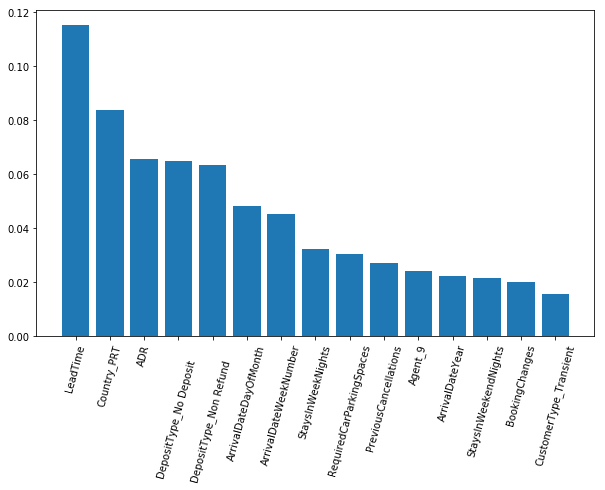

In [48]:
plt.figure(figsize=(10,6))
plt.bar(feature_importances.index, feature_importances['importance'])
plt.xticks(feature_importances.index, rotation=75)

Use confusion matrix to visualise results:

In [49]:
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[1093,  140],
       [ 186,  581]])

Plot confusion matrix:

[Text(0, 0.5, 'Not Canceled'), Text(0, 1.5, 'Canceled')]

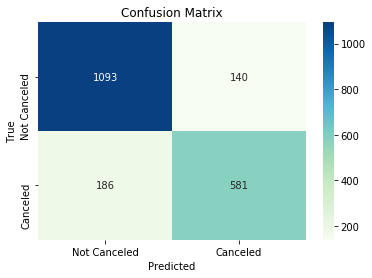

In [50]:
ax= plt.subplot()
cmap = plt.get_cmap('GnBu')
sns.heatmap(cm, annot=True, ax = ax, fmt='d', cmap=cmap)

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not Canceled', 'Canceled'])
ax.yaxis.set_ticklabels(['Not Canceled', 'Canceled'])

Draw area under curve:

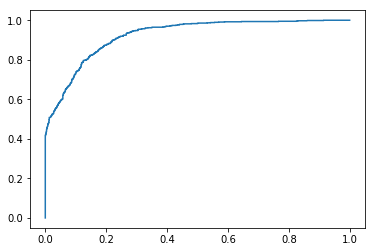

In [51]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)

### Fine tune hyper-parameters on best model:  XG Boost

Initate model:

In [52]:
xgb = XGBClassifier()

Define parameter list:

In [53]:
#n_estimators = [int(x) or x in np.linspace(start=10, stop=200, num=10)]
#max_depth = [int(x) or x in np.linspace(start=10, stop=200, num=10)]

param_grid = {'max_depth': [3, 4, 6, 8, 10],
              'n_estimators': [10, 20, 40, 50, 100],
              'eta': [0.1, 0.2, 0.3],
             'min_child_weight': [1, 2, 4],
              'colsample_bytree': [0.5, 0.7, 1]}

# n_estimators = number of trees in random forest
# max_depth = maximum number of levels in tree
# class_weight = Weights associated with classes in the form {class_label: weight}

Pass the initated model, hyper-parameter dictionary and cross validation to the GridSearchCV:

In [54]:
grid = GridSearchCV(xgb, param_grid, cv=5)

Fit this grid to the train dataset:

In [55]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 4, 6, 8, 10], 'n_estimators': [10, 20, 40, 50, 100], 'eta': [0.1, 0.2, 0.3], 'min_child_weight': [1, 2, 4], 'colsample_bytree': [0.5, 0.7, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Print score for best performing hyper-parameters & best hyper-parameters:

In [56]:
print(grid.best_score_)
print(grid.best_params_)

0.828875
{'colsample_bytree': 0.7, 'eta': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100}


Save this best scoring estimator as a model:

In [57]:
model=grid.best_estimator_

Test this model to test dataset (final evaluation):

In [58]:
model.score(X_test, y_test)

0.835

Feature importances:

In [59]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances = feature_importances.head(15)
feature_importances

,importance
DepositType_No Deposit,0.302618
DepositType_Non Refund,0.255997
Agent_9,0.031512
RequiredCarParkingSpaces,0.030334
MarketSegment_Online TA,0.030155
Country_PRT,0.022235
PreviousCancellations,0.020820
Agent_240,0.016488
Agent_7,0.014425
Agent_Other,0.013868


([<matplotlib.axis.XTick at 0x1a1f406208>,
 <a list of 15 Text xticklabel objects>)

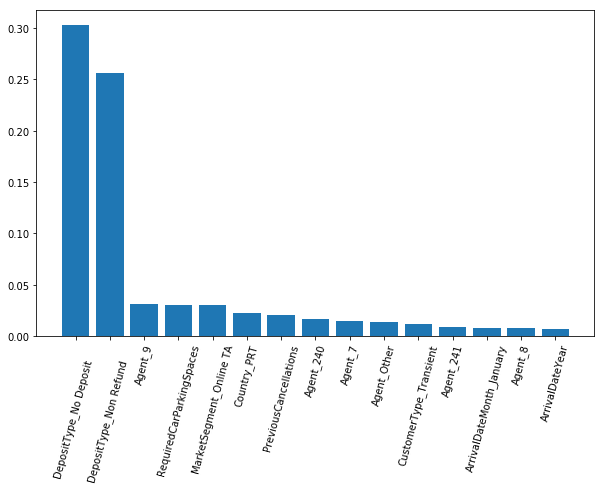

In [60]:
plt.figure(figsize=(10,6))
plt.bar(feature_importances.index, feature_importances['importance'])
plt.xticks(feature_importances.index, rotation=75)

Use confusion matrix to visualise results:

In [61]:
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[1100,  133],
       [ 197,  570]])

Plot confusion matrix:

[Text(0, 0.5, 'Not Canceled'), Text(0, 1.5, 'Canceled')]

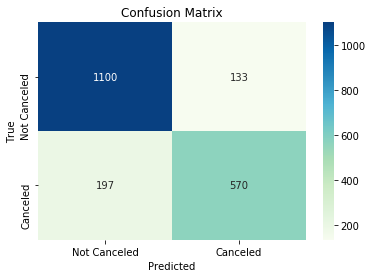

In [62]:
ax= plt.subplot()
cmap = plt.get_cmap('GnBu')
sns.heatmap(cm, annot=True, ax = ax, fmt='d', cmap=cmap)

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not Canceled', 'Canceled'])
ax.yaxis.set_ticklabels(['Not Canceled', 'Canceled'])

Draw area under curve:

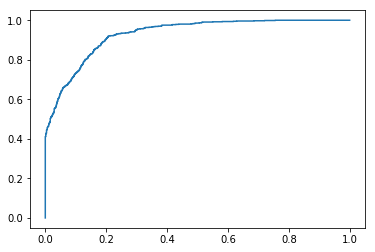

In [63]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)